<a href="https://colab.research.google.com/github/Kallukalluzzz/Mini-Project/blob/main/SDAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [76]:
data =pd.read_csv("/content/DGA dataset_new.csv")
data

,NM,H2,CH4,C2H6,C2H4,C2H2,Type
0,1,3930.0,2397.0,157.0,0.0,0.0,Partial discharge
1,2,37800.0,1740.0,249.0,8.0,8.0,Partial discharge
2,3,92600.0,10200.0,0.0,0.0,0.0,Partial discharge
3,4,8266.0,1061.0,22.0,0.0,0.0,Partial discharge
4,5,9340.0,995.0,60.0,6.0,7.0,Partial discharge
...,...,...,...,...,...,...,...
266,267,2443.0,3422.0,7852.0,3000.0,6394.0,No fault
267,268,4395.0,5201.0,6933.0,6788.0,2121.0,No fault
268,269,7613.0,1120.0,3363.0,4751.0,3393.0,No fault
269,270,2366.0,1031.0,5909.0,108.0,7025.0,No fault


In [77]:
X=data.drop(['Type', 'NM'],axis=1)
Y=data['Type']

In [78]:
Y = pd.factorize(Y)
Y = Y[0]

In [79]:
Xtrain.shape

(135, 5, 1)

In [80]:
Ytrain.shape

(135,)

In [81]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,train_size=0.5)

In [82]:
import numpy as np
Xtrain = np.expand_dims(Xtrain, axis=2)
Xtest = np.expand_dims(Xtest, axis=2)

In [83]:
Xtrain.shape

(135, 5, 1)

In [84]:
noise_factor = 0.2
x_train_noisy= Xtrain + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=Xtrain.shape)
x_test_noisy = Xtest + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=Xtest.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

In [85]:
x_train_noisy.shape

(135, 5, 1)

In [86]:
x_test_noisy.shape

(136, 5, 1)

In [87]:
# create model
model = Sequential()
model.add(Dense(500, input_shape=(5,1), activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

In [88]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [74]:
# Training model
model.fit(x_train_noisy, Xtrain, validation_data=(x_test_noisy, Xtest), epochs=500, batch_size=200)

Epoch 1/500
1/1 [==============================] - 0s 171ms/step - loss: 5325615616.0000 - val_loss: inf
Epoch 2/500
1/1 [==============================] - 0s 144ms/step - loss: 5325615104.0000 - val_loss: inf
Epoch 3/500
1/1 [==============================] - 0s 125ms/step - loss: 5325615616.0000 - val_loss: inf
Epoch 4/500
1/1 [==============================] - 0s 127ms/step - loss: 5325615104.0000 - val_loss: inf
Epoch 5/500
1/1 [==============================] - 0s 130ms/step - loss: 5325615616.0000 - val_loss: inf
Epoch 6/500
1/1 [==============================] - 0s 121ms/step - loss: 5325615616.0000 - val_loss: inf
Epoch 7/500
1/1 [==============================] - 0s 118ms/step - loss: 5325615104.0000 - val_loss: inf
Epoch 8/500
1/1 [==============================] - 0s 119ms/step - loss: 5325615104.0000 - val_loss: inf
Epoch 9/500
1/1 [==============================] - 0s 122ms/step - loss: 5325615104.0000 - val_loss: inf
Epoch 10/500
1/1 [==============================] - 0s 

In [89]:
# Final evaluation of the model
pred = model.predict(x_test_noisy)

In [90]:
pred.shape

(136, 5, 784)

Test Images


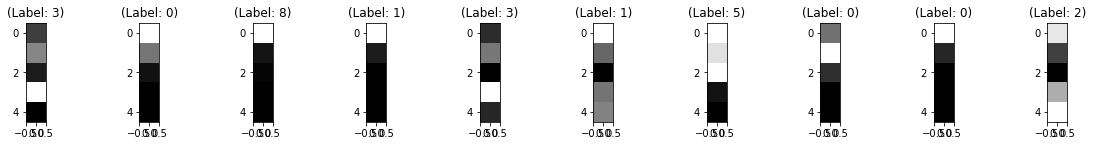

Test Images with Noise


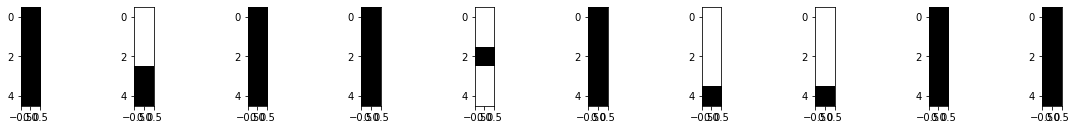

Reconstruction of Noisy Test Images


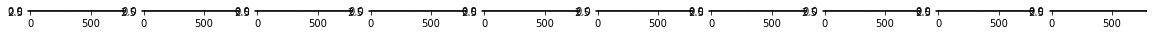

In [91]:
Xtest = numpy.reshape(Xtest, (136,5,1)) *255
pred = numpy.reshape(pred, (136,5,784)) *255
x_test_noisy = numpy.reshape(x_test_noisy, (136,5,1)) *255
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(Xtest[i,:,:], cmap='gray')
    curr_lbl = Ytest[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()